# Analysis of SAM ratings

## Startup

Install required packages

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

Predefined variables

In [81]:
# Game labels
game_label = ['G1: Train Sim World', 'G2: Unravel', 'G3: Slender - The Arrival', 'G4: Goat Simulator']

# behavioural assesment values
emotions = ['satisfied', 'boring', 'horrible', 'calm', 'funny']
AV = ['valence', 'arousal']

## Import SAM ratings

In [82]:
# define directory
root = '/Users/a.m.brandsuva.nl/Documents/PhD/summer_school/NeuroMatch_2021/' # ADD root directory

# import SAM ratings file
ratings = pd.read_csv(root + 'GameLabels.csv', sep=';', header=0)
# print(SAM_rat)

# print headers
print('Dataframe headers:')
column_label = list(ratings.columns.values)
print(column_label)

# determine number of subjects
subject_n = len(ratings.loc[:, 'subject'].unique())
print('\nTotal number of subjects: {:d}'.format(subject_n))

Dataframe headers:
['subject', 'game', 'gender', 'age', 'disturbance', 'experience', 'memory', 'satisfied', 'boring', 'horrible', 'calm', 'funny', 'valence', 'arousal']

Total number of subjects: 27


## Retrieve rating values

Visualize ratings over all subjects per game.

In [83]:
# initiate arrays to store ratings
mu_emotions = np.zeros((len(game_labels), len(emotions)))
mu_AV = np.zeros((len(game_labels), len(AV)))

err_emotions = np.zeros((len(game_labels), len(emotions)))
err_AV = np.zeros((len(game_labels), len(AV)))

# iterate over games and retrieve values
for i in range(len(game_label)):
    
    # select entries for one game
    r_game = ratings[ratings.game == i + 1]
#     print(rat_game)

    # compute mean
    mu_emotions[i, :] = np.nanmean(r_game.loc[:, emotions], axis=0)
    mu_AV[i, :] = np.nanmean(r_game.loc[:, AV], axis=0)
    
    # compute error
    err_emotions[i, :] = np.nanstd(r_game.loc[:, emotions], axis=0)/math.sqrt(subject_n)
    err_AV[i, :] = np.nanstd(r_game.loc[:, AV], axis=0)/math.sqrt(subject_n)
    


## Visualize ratings per game

Visualize emotion ratings per game

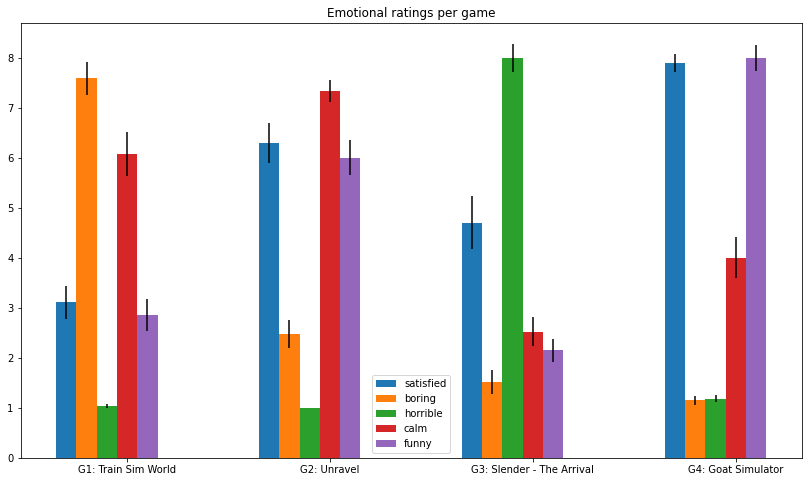

In [86]:
fig = plt.figure(figsize=(14, 8))
ax = plt.gca()
ax.set_title('Emotional ratings per game')

# define x and y values
x = np.arange(0, len(game_label)*2, 2)
width = 0.2

for i in range(len(emotions)):
    
    # plot values
    ax.bar(x + (i*width), mu_emotions[:, i], width=width, label=emotions[i], yerr=err_emotions[:, i])
    
    # add axis labels
    ax.set_xticks(x + 0.6)
    ax.set_xticklabels(game_label)

    # plot legend
plt.legend()

Visualize valence-arousal ratings per game

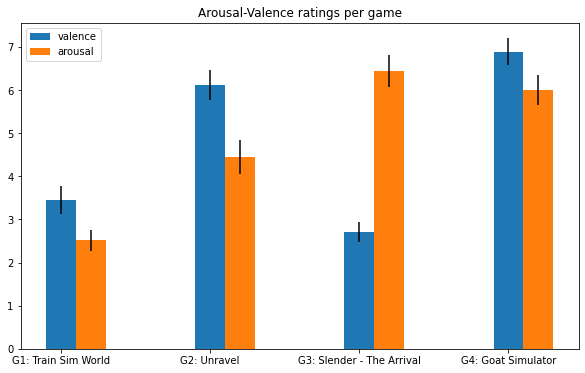

In [87]:
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_title('Arousal-Valence ratings per game')

# define x and y values
x = np.arange(len(game_label))
width = 0.2

for i in range(len(AV)):
    
    # plot values
    ax.bar(x + (i*width), mu_AV[:, i], width=width, label=AV[i], yerr=err_AV[:, i])
    
    # add axis labels
    ax.set_xticks(x)
    ax.set_xticklabels(game_label)

    # plot legend
plt.legend()